## Intel Scene Classififcation

### The given dataset has different scenes as below
1.buildings
2.forest
3.glacier
4.mountain
5.sea
6.street

For each screns, it has different set of picture for to train the model and test it.

This model uses CV2 Image read option

### Lets import the necesassary libraries and then datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2

from tqdm import tqdm
import random as rn
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

from skimage import feature, color, data
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
# The training data set is in the /Volumes/Arun⁩/Machine Learning⁩/Final Project⁩/Intel Image Classification/seg_train
trn_img_path = "/Users/macos/Documents/Intel Image Classification/seg_train"
print(os.listdir(trn_img_path))

# The testing data set is in the /Volumes/Arun⁩/Machine Learning⁩/Final Project⁩/Intel Image Classification/seg_test
tst_img_path = "/Users/macos/Documents/Intel Image Classification/seg_test"
print(os.listdir(tst_img_path))

['forest', 'buildings', '.DS_Store', 'Icon\r', 'glacier', 'street', 'mountain', 'sea']
['forest', 'buildings', '.DS_Store', 'Icon\r', 'glacier', 'street', 'mountain', 'sea']


In [3]:
#assign the path variable of training image category directories
trn_buildings_dir = "/Users/macos/Documents/Intel Image Classification/seg_train/buildings"
trn_forest_dir = "/Users/macos/Documents/Intel Image Classification/seg_train/forest"
trn_glacier_dir = "/Users/macos/Documents/Intel Image Classification/seg_train/glacier"
trn_mountain_dir = "/Users/macos/Documents/Intel Image Classification/seg_train/mountain"
trn_sea_dir = "/Users/macos/Documents/Intel Image Classification/seg_train/sea"
trn_street_dir = "/Users/macos/Documents/Intel Image Classification/seg_train/street"

#assign the path variable of testing image category directories
tst_buildings_dir = "/Users/macos/Documents/Intel Image Classification/seg_train/buildings"
tst_forest_dir = "/Users/macos/Documents/Intel Image Classification/seg_train/forest"
tst_glacier_dir = "/Users/macos/Documents/Intel Image Classification/seg_train/glacier"
tst_mountain_dir = "/Users/macos/Documents/Intel Image Classification/seg_train/mountain"
tst_sea_dir = "/Users/macos/Documents/Intel Image Classification/seg_train/sea"
tst_street_dir = "/Users/macos/Documents/Intel Image Classification/seg_train/street"

In [4]:
# Lets create 2 set of arrays for train & testing data's. One for to store the Image data and anther one for label details
X_train = [] #Store the training Image data
Z_train = [] # Store the training image label

X_test = [] # Store the testing image data
Z_test = [] # Store the testing image label
# need to resize all the images into same size, for to maintain the uniformity
img_size = 150

In [17]:
# Lets define a function to store the image data and label for it
def image_data (scene_type, scene_path, data_type):
    for img in tqdm(os.listdir(scene_path)):
        img_path = os.path.join(scene_path,img)
        img_data = cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2GRAY)
        #img_data = color.rgb2gray(img_)
        if(data_type =='Training'):
            X_train.append(np.array(feature.hog(img_data)))
            Z_train.append(str(scene_type))
        if(data_type =='Testing'):
            X_test.append(np.asarray(img))
            Z_test.append(np.array(str(scene_type)))

In [18]:
# call the Image_data function for to store training images from each scene

#building images
image_data('Building',trn_buildings_dir,'Training')
print(len(X_train))

#forest images
image_data('Forest',trn_forest_dir,'Training')
print(len(X_train))

# glacier images
image_data('Glacier',trn_glacier_dir,'Training')
print(len(X_train))

# mountain images
image_data('Mountain',trn_mountain_dir,'Training')
print(len(X_train))

# sea images
image_data('Sea',trn_sea_dir,'Training')
print(len(X_train))

#street images
image_data('Street',trn_street_dir,'Training')
print(len(X_train))


 18%|█▊        | 394/2192 [00:04<00:21, 85.37it/s]


error: OpenCV(4.1.0-openvino) /localdisk/jenkins/workspace/OpenCV/OpenVINO/build/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [28]:
X_train_data = np.array([np.array(xi) for xi in X_train])

In [31]:
X_train_data1 = 

dtype('O')

In [7]:
# call the Image_data function for to store testing images from each scene

#building images
image_data('Building',tst_buildings_dir,'Testing')
print(len(X_test))

#forest images
image_data('Forest',tst_forest_dir,'Testing')
print(len(X_test))

# glacier images
image_data('Glacier',tst_glacier_dir,'Testing')
print(len(X_test))

# mountain images
image_data('Mountain',tst_mountain_dir,'Testing')
print(len(X_test))

# sea images
image_data('Sea',tst_sea_dir,'Testing')
print(len(X_test))

#street images
image_data('Street',tst_street_dir,'Testing')
print(len(X_test))


  5%|▌         | 123/2272 [00:00<00:01, 1229.91it/s]

2192


  3%|▎         | 80/2405 [00:00<00:02, 792.15it/s]

4464


  6%|▌         | 155/2513 [00:00<00:01, 1546.75it/s]

6869


  7%|▋         | 148/2275 [00:00<00:01, 1478.24it/s]

9382


  5%|▌         | 128/2383 [00:00<00:01, 1270.84it/s]

11657


100%|██████████| 2383/2383 [00:01<00:00, 1278.22it/s]

14040


### Lets visualize some random data

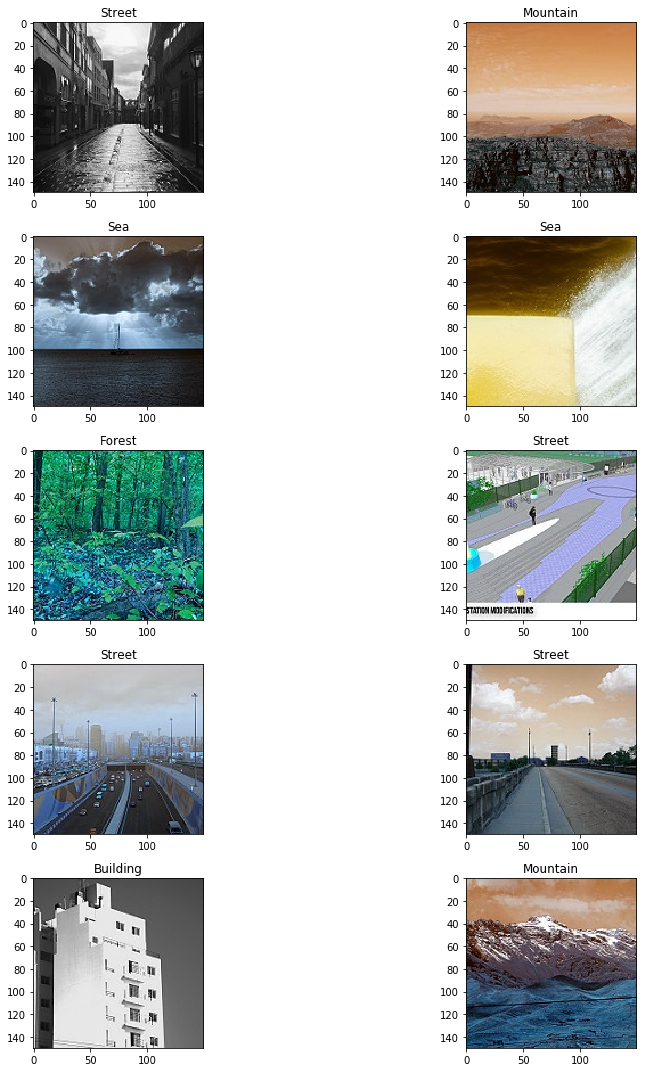

In [8]:
# From Testing data
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z_test))
        ax[i,j].imshow(X_test[l])
        ax[i,j].set_title(Z_test[l])
        
plt.tight_layout()

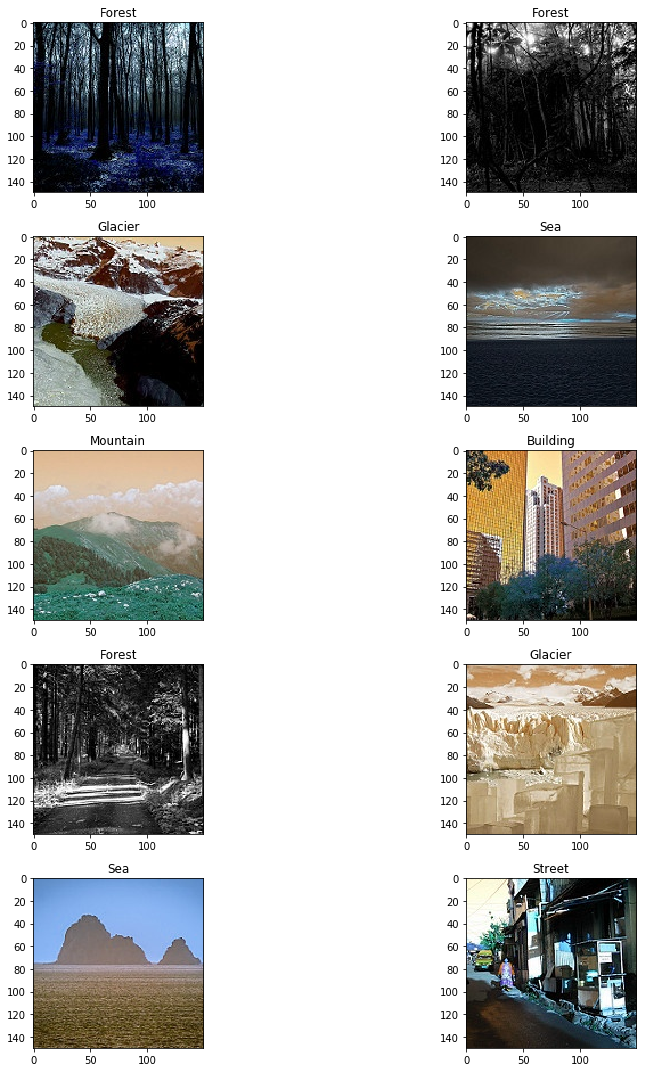

In [9]:
# From Training data
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z_train))
        ax[i,j].imshow(X_train[l])
        ax[i,j].set_title(Z_train[l])
        
plt.tight_layout()

In [10]:
image_data_train = np.array(X_train)
image_data_test = np.array(X_test)

In [11]:
# Let's encode the lables
le = LabelEncoder()
y_train = le.fit_transform(Z_train)
y_test = le.fit_transform(Z_test)

y_train = to_categorical(y_train,6)
y_test = to_categorical(y_test,6)

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [21]:
image_data_train[1].reshape((-1))
logistic / svm / randomforest -> extract using hog / sift

array([171, 115,  80, ...,  85, 213, 248], dtype=uint8)

In [15]:
lr = LogisticRegression()
lr.fit(image_data_train,y_train)

/Users/macos/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: setting an array element with a sequence.

In [36]:
# create all the machine learning models
models = []
models.append(('LR', LogisticRegression(random_state=9)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=9)))
models.append(('RF', RandomForestClassifier(n_estimators=100, random_state=9)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=9)))

# variables to hold the results and names
results = []
names = []
scoring = "accuracy"

In [26]:
y_train.shape

(14040, 6)

In [30]:
# filter all the warnings
import warnings
warnings.filterwarnings('ignore')

# 10-fold cross validation
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

ValueError: setting an array element with a sequence.